<br>

# 📈 **SALES FORECASTING SYSTEM** 📈

**ARIMA MODEL**

<br>

## **INDEX**

- **STEP 1: DEFINITION PROBLEM AND DATA COLLECTION**
- **STEP 2: CONSTRUCT AND ANALYZE THE TIME SERIE**
- **STEP 3: TRAIN AN ARIMA**
- **STEP 4: MAKE PREDICTIONS USING THE TEST SET**
- **STEP 5: SAVE THE MODEL**

<br>


<br>

## **STEP 1: DEFINITION PROBLEM AND DATA COLLECTION**

- 1.1. Problem Definition
- 1.2. Library Importing
- 1.3. Data Collection

<br>

**1.1. DEFINITION PROBLEM**

In this project, we aim to develop a **Sales Forecasting System** to support the strategic decision of setting up a new company warehouse. The main challenge is to estimate future sales trends and seasonal patterns to ensure the warehouse will have adequate space for inventory management in the coming months. Using historical sales data, we aim to construct a robust time series model that captures trends, seasonality, and potential noise to provide accurate and actionable forecasts.

<br>

**RESEARCH QUESTIONS**

1) **Sales Growth Patterns**: What are the historical trends and seasonality in sales data?

2) **Forecasting Accuracy**: How accurately can we predict future sales using time series models such as ARIMA?

3) **Stationarity and Variability**: Is the time series stationary? How significant is the variability or noise in the sales data?

4) **Model Evaluation**: What is the most appropriate metric for evaluating the performance of the model? How do the predicted sales compare with actual sales in the test set?

<br>

**FEATURE IMPORTANCE**

Time series data inherently focuses on temporal information rather than traditional feature engineering. However, the key features in this problem include:

- **Trend Component**: The overall increase in sales observed since the company’s creation.
- **Seasonal Component**: Regular fluctuations in sales that repeat over time (e.g., monthly patterns).
- **Residuals (Noise)**: Irregular variations that cannot be explained by trend or seasonality.

Each of these components plays a critical role in accurately forecasting future sales. Understanding their importance helps in identifying the underlying drivers of sales growth.

<br>

**FEATURE INTERACTIONS**

In time series forecasting, interactions between trend, seasonality, and residual components are crucial:

1) **Trend and Seasonality**: A rising trend combined with strong seasonal patterns suggests increasing demand cycles.
2) **Residual and Noise**: Unexpected fluctuations may indicate external factors influencing sales, such as market conditions or promotional events.
3) **Periodicity**: The interaction between trend and specific periodic cycles (e.g., yearly or monthly) determines the predictive power of the model.

The decomposition of the time series allows us to disentangle these interactions for better model performance and interpretability.

<br>

**MODEL PERFORMANCE**

To evaluate the model, we will use the **`Akaike Information Criterion (AIC)`** during the model training phase to optimize the parameterization of ARIMA. Once the model is trained, its predictive power will be assessed using metrics such as:

- **Mean Absolute Error (MAE)**: Measures average prediction errors in sales.
- **Root Mean Squared Error (RMSE)**: Evaluates the magnitude of error, giving higher weight to larger errors.
- **Visual Analysis**: Comparing predicted vs. actual sales in the test set through visual plots.

The objective is to ensure the model not only provides accurate predictions but also captures the temporal dynamics of sales.

**1.2. LIBRARY IMPORTING**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import joblib
import warnings
warnings.filterwarnings("ignore")

**1.3. DATA COLLECTION**

In [47]:

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")
df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


<br>

## **STEP 2: CONSTRUCT AND ANALYZE THE TIME SERIE**


- 2.1. Transform Data into a Time Series
- 2.2. Plot the Time Series
- 2.3. Addressing the questions through chart analysis


<br>

**2.1. TRANSFORM DATA INTO A TIME SERIES**

In [48]:
#Transform data into a time series
df['date'] = pd.to_datetime(df['date'])  # Convertimos la columna 'date' a formato datetime
df.set_index('date', inplace=True)  # Establecemos 'date' como índice
df = df.sort_index()  # Aseguramos que esté ordenado por fecha
df.head()

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633


<br>

**2.2. PLOT THE TIME SERIES**

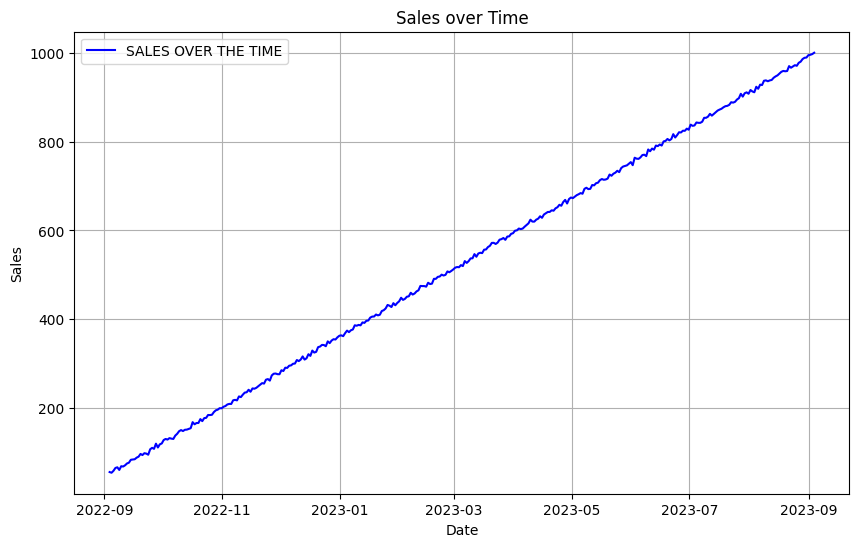

In [ ]:
# Plot the time series

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['sales'], label='SALES OVER TIME', color='blue')
plt.title('SALES OVER TIME')
print()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

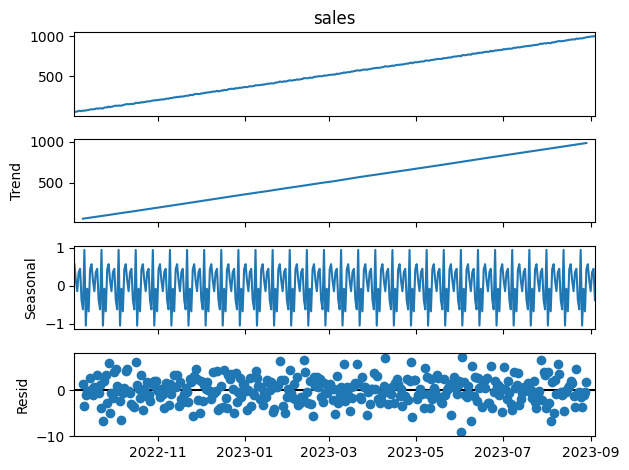

In [50]:
decomposition = seasonal_decompose(df['sales'], model='additive', period=12)  # Assuming monthly periodicity
decomposition.plot()
plt.show()

<br>

**2.3. ADDRESSING THE QUESTIONS THROUGH CHART ANALYSIS**


* **Which is the tensor of the time series?** The tensor of the time series is **`daily`** because the data is recorded by individual dates, as observed in the DataFrame index and in the sales over time graph.
 
* **Which is the trend?** **`The trend is clearly upward`**, as shown in both the main sales graph and the decomposition (component "Trend"), indicating a steady growth in sales.

* **Is it stationary?** **NO, the series is not stationary**. A stationary series must have a constant mean and variance over time, which is not the case here, as sales are continuously increasing.

* **Is there variability or noise?** **YES, there is `variability` and `noise`**. This is observed in the last subplot of the decomposition ("Residual"), where the residuals fluctuate around zero, indicating the presence of noise not explained by the trend or seasonality.

<br>

## **STEP 3: TRAIN AN ARIMA**

- 3.1. Split the data into training and testing sets
- 3.2. Hyperparameter tuning.
- 3.3. Train the `ARIMA` model


<br>

Use the training data to find the best parameterization of your ARIMA model.

<br>

**3.1 SPLIT THE DATA INTO TRAINING AND TESTING SETS**

- We begin by creating a training set and a test set from the data.

In [51]:
# We train our model on 80% of the data
train_size = int(len(df) * 0.8)
train, test = df['sales'][:train_size], df['sales'][train_size:]

print(f"Training set size: {len(train)}")
print(f"Test set size: {len(test)}")

Training set size: 292
Test set size: 74


<br>

**3.2 HYPERPARAMETER TUNING (p, d, q):**

In [52]:
import itertools
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Parámetros a probar
p = d = q = range(0, 3)  # Rango de valores para (p, d, q)
pdq = list(itertools.product(p, d, q))

best_aic = np.inf  # Inicializamos el mejor AIC como infinito
best_params = None  # Inicializamos los mejores parámetros como None

# Probar combinaciones de parámetros
for param in pdq:
    try:
        model = ARIMA(train, order=param)  # Creamos el modelo ARIMA
        results = model.fit()  # Ajustamos el modelo
        if results.aic < best_aic:  # Comparamos el AIC actual con el mejor AIC
            best_aic = results.aic
            best_params = param
    except Exception as e:
        # Captura errores al probar combinaciones y continúa con el siguiente parámetro
        print(f"Error con parámetros {param}: {e}")
        continue

print(f"Mejor combinación de parámetros (p, d, q): {best_params}")


Mejor combinación de parámetros (p, d, q): (2, 0, 2)


<br>

**3.3 TRAIN THE ARIMA MODEL**

We evaluated multiple combinations of parameters (p, d, q) for the ARIMA model, selecting the model with the lowest AIC value.

In [53]:
# Paso 3.3: Entrenar el modelo ARIMA
model = ARIMA(train, order=best_params)
arima_results = model.fit()

print(arima_results.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  292
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   0.000
Date:                Mon, 09 Dec 2024   AIC                             12.000
Time:                        22:36:59   BIC                             34.061
Sample:                    09-03-2022   HQIC                            20.837
                         - 06-21-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        438.3725   6.68e-07   6.56e+08      0.000     438.373     438.373
ar.L1          2.0000   3.13e-07   6.39e+06      0.000       2.000       2.000
ar.L2         -1.0000   1.08e-08  -9.23e+07      0.0

<br>

## **STEP 4: MAKE PREDICTIONS USING THE TEST SET**


We use the trained model to make predictions on the test set and measure its performance

Mean Squared Error (MSE): 220452.40530225026



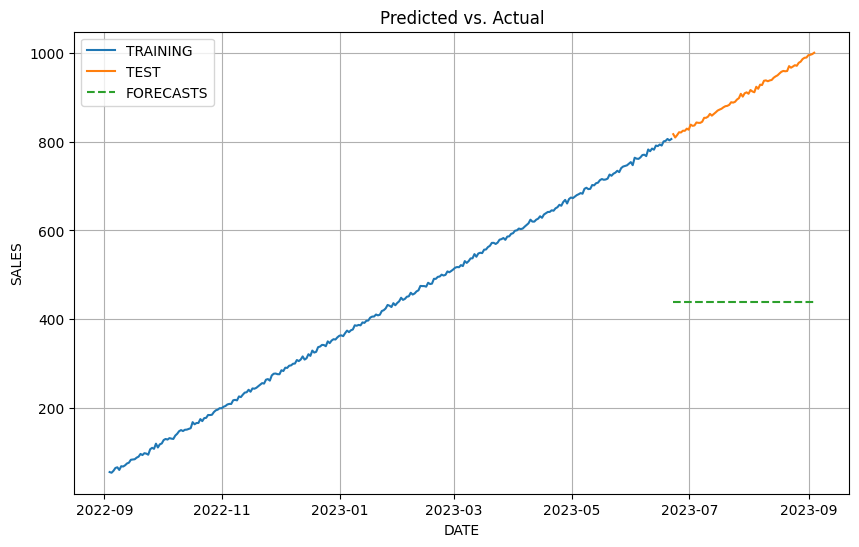

In [54]:
# Forecast and compare with actual values
forecast = arima_results.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

# Evaluation metrics
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error (MSE): {mse}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='TRAINING')
plt.plot(test.index, test, label='TEST')
plt.plot(forecast.index, forecast, label='FORECASTS', linestyle='--')
plt.legend()
plt.title('Predicted vs. Actual')
print()
plt.xlabel('DATE')
plt.ylabel('SALES')
plt.grid()
plt.show()

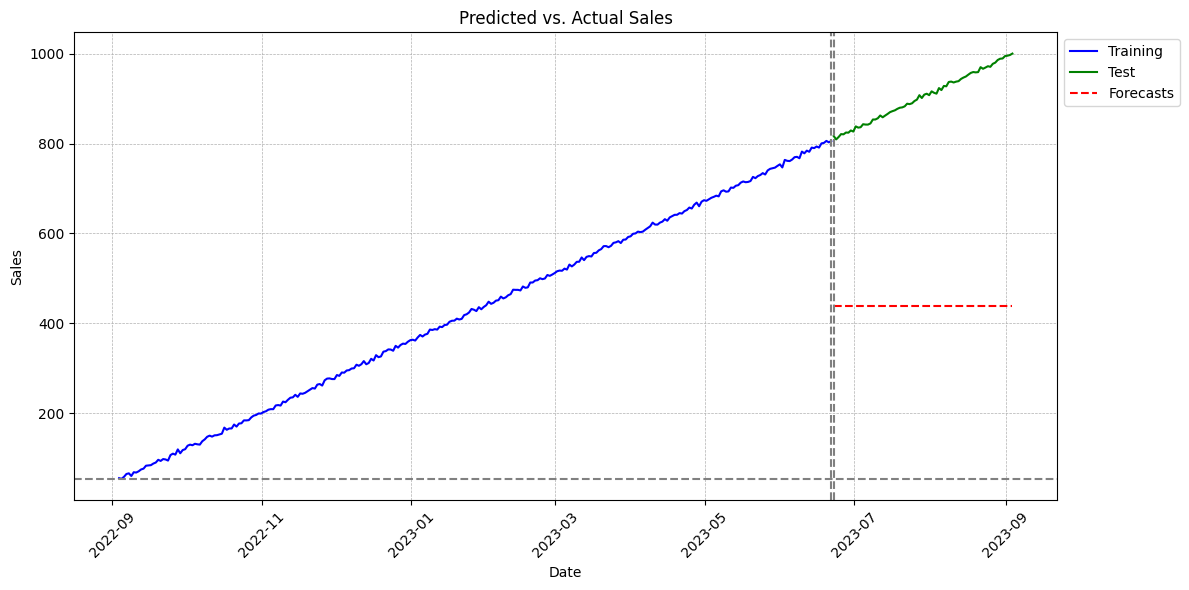

In [55]:
# Plot the results
plt.figure(figsize=(12, 6))  # Increased width for better readability

# Customize line styles and colors
plt.plot(train.index, train, label='Training', color='blue')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(forecast.index, forecast, label='Forecasts', color='red', linestyle='--')

# Improved Legend with color indicators
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Legend at top-left corner

plt.title('Predicted vs. Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)  # Uncomment for rotated labels

# Highlight specific points (example: minimum sales)
min_sales = train.min()
plt.axhline(y=min_sales, color='gray', linestyle='--', label='Min Sales')

# Add vertical lines for boundaries
plt.axvline(x=train.index[-1], color='gray', linestyle='--', label='Training End')
plt.axvline(x=test.index[0], color='gray', linestyle='--', label='Test Start')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Adjust grid style
plt.tight_layout()  # Adjust spacing between elements
plt.show()

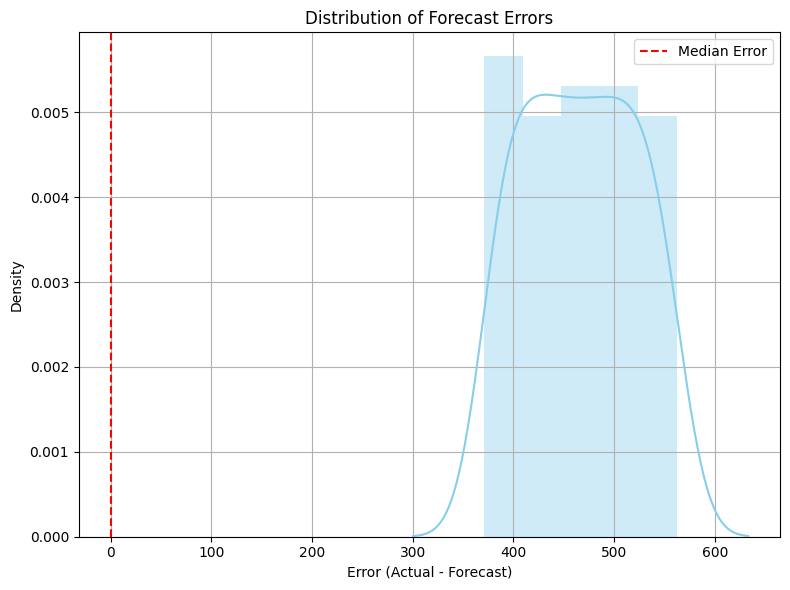

In [56]:

# Calculate errors
errors = test - forecast

# Plot the results
plt.figure(figsize=(8, 6))
sns.distplot(errors, kde=True, color='skyblue')  # Kernel density estimation for smoother distribution
plt.axvline(x=0, color='red', linestyle='--', label='Median Error')  # Add median error line
plt.title('Distribution of Forecast Errors')
plt.xlabel('Error (Actual - Forecast)')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

<br>

## **STEP 5: SAVE THE MODEL**


We save the trained ARIMA model to a file for future use

In [57]:
# Save the model

joblib.dump(arima_results, 'arima_model.pkl')
print("ARIMA model saved as 'arima_model.pkl'")

ARIMA model saved as 'arima_model.pkl'
